In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

t_s = []
x_s = []
y_s = []

t_g = []
x_g = []
y_g = []
phi_g = []


path = r'data/gnss-1.csv'
line = 0
with open(path) as file:
    reader = csv.reader(file)
    for row in reader:
        if line > 0:
            t_s.append(float(row[0]))
            x_s.append(float(row[1]))
            y_s.append(float(row[2]))
        line += 1


path = r'data/groundtruth-1.csv'
line = 0
with open(path) as file: # Grab every 20th element to mimic dt=0.1
    reader = csv.reader(file)
    for row in reader:
        if line > 0:
            t_g.append(float(row[0]))
            x_g.append(float(row[1]))
            y_g.append(float(row[2]))
            phi_g.append(float(row[3]))
        line += 1

Variance

In [36]:
t_g = []
x_g = []
y_g = []
phi_g = []

path = r'data/groundtruth-1.csv'
line = 0
counter = 20
with open(path) as file: # Grab every 20th element to mimic dt=0.1
    reader = csv.reader(file)
    for row in reader:
        if line > 0:
            if counter == 20:

                t_g.append(float(row[0]))
                x_g.append(float(row[1]))
                y_g.append(float(row[2]))
                phi_g.append(float(row[3]))

                counter = 0
            counter += 1
        line += 1

t_g.pop(0)
x_g.pop(0)
y_g.pop(0)
phi_g.pop(0)

path = r'plot/kinematic_states/'

v = np.load(path+'v.npy').astype(float)
phi = np.load(path+'phi.npy').astype(float)
x = np.load(path+'x.npy').astype(float)
y = np.load(path+'y.npy').astype(float)


sum = 0
for i in range(len(x_s)):
    # Process noise variance
    # sum += (x[i+1] - x_g[i])**2
    # sum += (y[i+1] - y_g[i])**2
    # sum += (x[i+1] - x_g[i])*(y[i+1] - y_g[i])
    # sum += (phi[i+1] - phi_g[i])**2
    # sum += (phi[i+1] - phi_g[i])*(x[i+1] - x_g[i])
    # sum += (phi[i+1] - phi_g[i])*(y[i+1] - y_g[i])

    # Sensor noise variance
    # sum += (x_s[i] - x_g[i])**2
    # sum += (y_s[i] - y_g[i])**2
    sum += (x_s[i] - x_g[i])*(y_s[i] - y_g[i])
sum /= (len(x_g)-1)
print('Var = {}'.format(sum))

Var = 0.07841359413896912


In [25]:
t = np.load(path+'t.npy').astype(float)

for i in range(len(t)):
    if t[i] > 20:
        print(i-len(t))
        break

-200


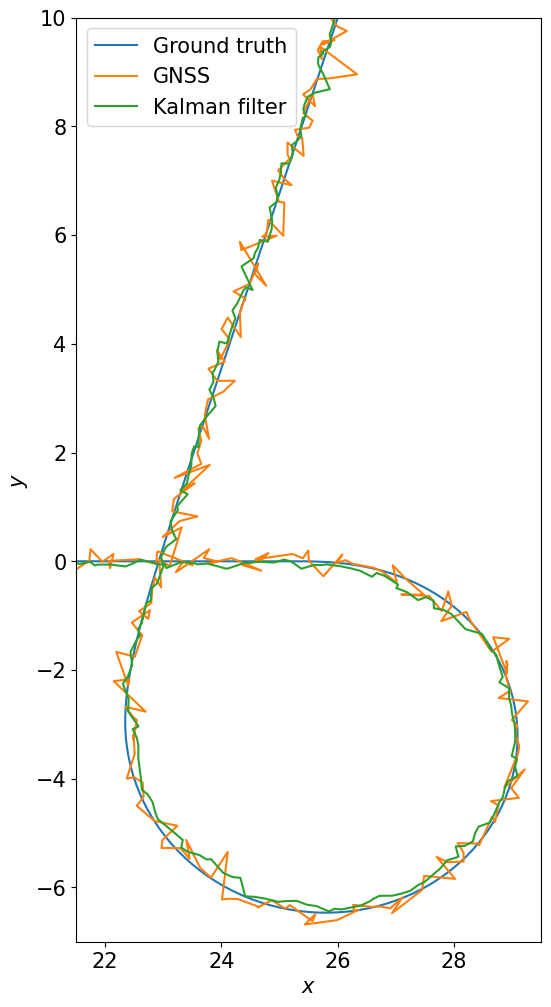

In [55]:
path = r'plot/kinematic_states/'

v = np.load(path+'v.npy').astype(float)
phi = np.load(path+'phi.npy').astype(float)
x = np.load(path+'x.npy').astype(float)
y = np.load(path+'y.npy').astype(float)

fig, ax = plt.subplots(figsize=(6,12))
# fig, ax = plt.subplots(figsize=(14,10))

time = 200
# ax.plot(x_g[-time:], y_g[-time:], label='Ground truth')
# ax.plot(x_s[-time:], y_s[-time:], label='GNSS')
# ax.plot(x[-time:], y[-time:], label='Kalman filter')

ax.plot(x_g, y_g, label='Ground truth')
ax.plot(x_s, y_s, label='GNSS')
ax.plot(x, y, label='Kalman filter')
fs = 15
ax.legend(loc='upper left', fontsize=fs)
ax.set_xlabel('$x$', fontsize=fs)
ax.set_ylabel('$y$', fontsize=fs)
ax.set_xlim([21.5,29.5])
ax.set_ylim([-7,10])
ax.tick_params(axis='both', which='major', labelsize=fs)
# plt.savefig(path+'path_taken.png')
plt.savefig(path+'path_taken_zoom.png')
plt.show()


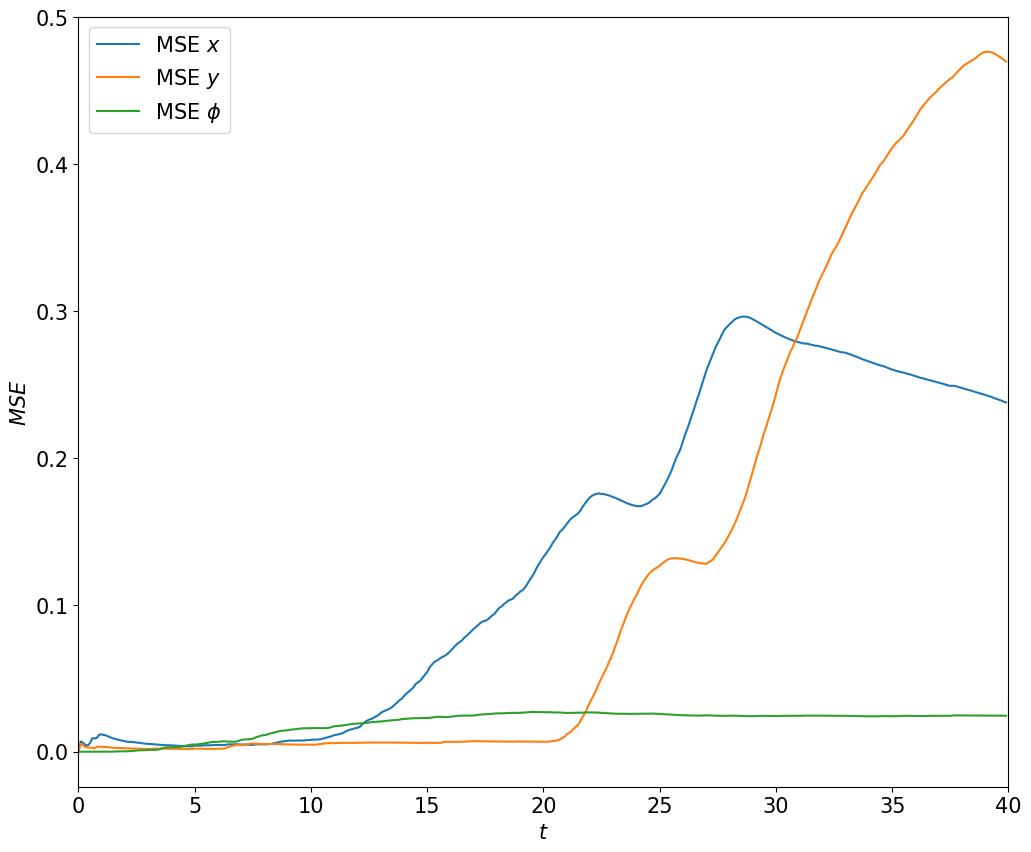

In [59]:
t_g = []
x_g = []
y_g = []
phi_g = []

path = r'data/groundtruth-1.csv'
line = 0
with open(path) as file:
    reader = csv.reader(file)
    for row in reader:
        if line > 0:
            t_g.append(float(row[0]))
            x_g.append(float(row[1]))
            y_g.append(float(row[2]))
            phi_g.append(float(row[3]))
        line += 1

t_g = t_g[::20]
x_g = x_g[::20]
y_g = y_g[::20]
phi_g = phi_g[::20]

t_g = np.array(t_g[:-1])
x_g = np.array(x_g[:-1])
y_g = np.array(y_g[:-1])
phi_g = np.array(phi_g[:-1])

path = r'plot/kinematic_states/'


x = np.load(path+'x.npy').astype(float)
y = np.load(path+'y.npy').astype(float)
phi = np.load(path+'phi.npy').astype(float)
t = np.load(path+'t.npy').astype(float)

x = np.delete(x, 0)
y = np.delete(y, 0)
phi = np.delete(phi, 0)
t = np.delete(t, 0)





x_mse = []
y_mse = []
phi_mse = []

for i in range(len(t)):
    x_mse.append(np.mean((x[:(i+1)]-x_g[:(i+1)])**2))
    y_mse.append(np.mean((y[:(i+1)]-y_g[:(i+1)])**2))
    phi_mse.append(np.mean((phi[:(i+1)]-phi_g[:(i+1)])**2))





fig, ax = plt.subplots(figsize=(12,10))
ax.plot(t, x_mse, label='MSE $x$')
ax.plot(t, y_mse, label='MSE $y$')
ax.plot(t, phi_mse, label='MSE $\\phi$')
ax.legend(loc='upper left', fontsize=fs)
ax.set_xlabel('$t$', fontsize=fs)
ax.set_ylabel('$MSE$', fontsize=fs)
ax.set_xlim([0,40])
ax.tick_params(axis='both', which='major', labelsize=fs)
plt.savefig(path+'MSE.png')
plt.show()


[[ 6.16658778 -0.31361368  0.93167031  0.23905624]
 [-0.31111208  4.02858336 -0.01488989  0.19396852]
 [ 0.93348421 -0.01102273  0.68223224 -0.16882026]
 [ 0.23962231  0.17456755 -0.16852159  0.53053435]]


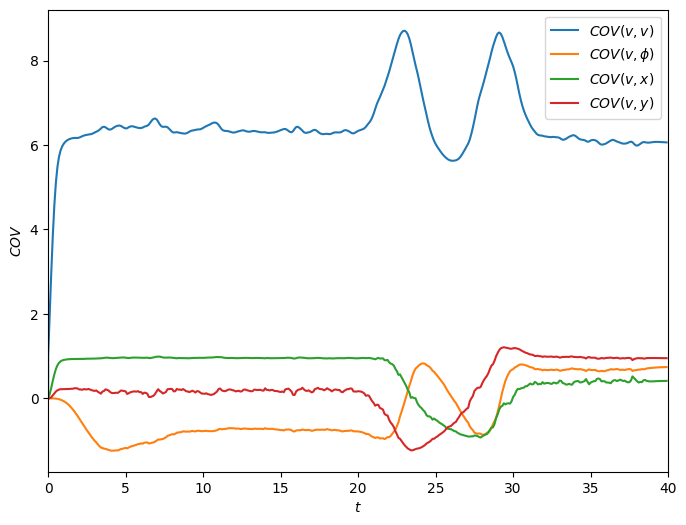

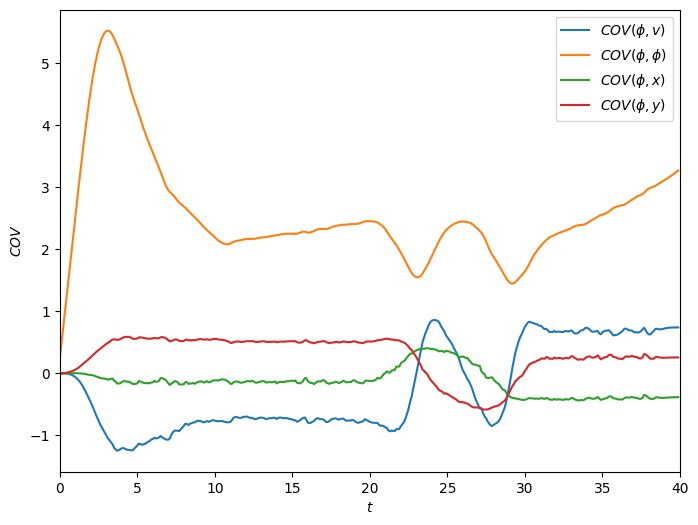

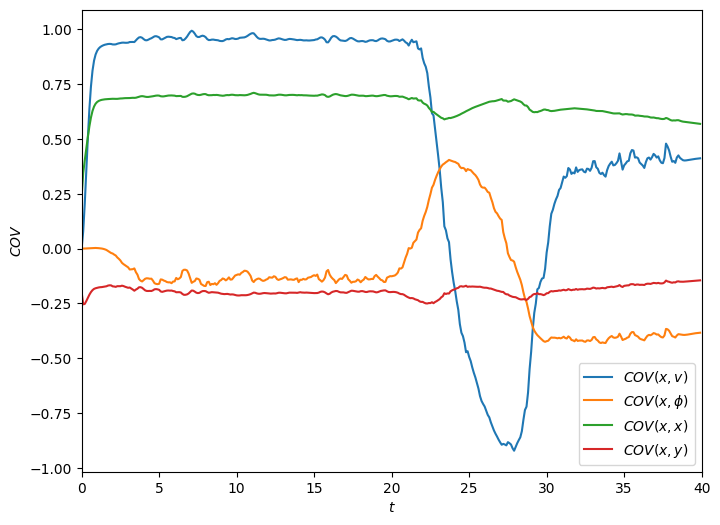

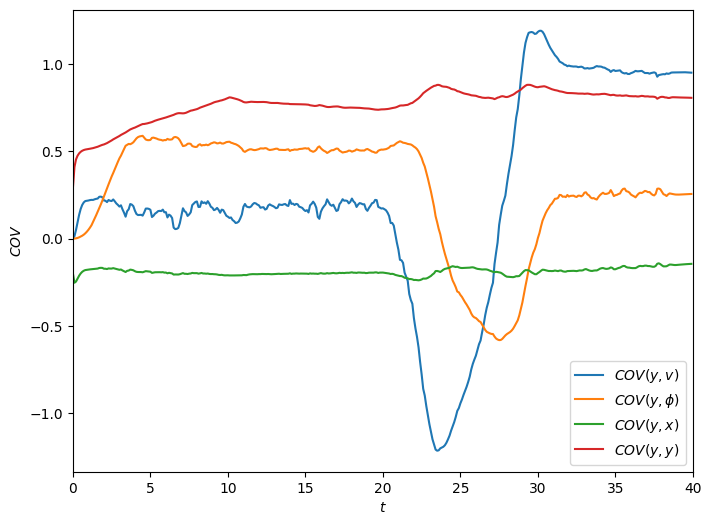

In [10]:
path = r'plot/kinematic_states'

P = np.load(path+'P.npy').astype(float)
t = np.load(path+'t.npy').astype(float)

print(P[18])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, P[:,0,0], label='$COV(v,v)$')
ax.plot(t, P[:,0,1], label='$COV(v,\\phi)$')
ax.plot(t, P[:,0,2], label='$COV(v,x)$')
ax.plot(t, P[:,0,3], label='$COV(v,y)$')

ax.legend(loc='upper right')
ax.set_xlim([0,40])
ax.set_ylabel('$COV$')
ax.set_xlabel('$t$')
plt.savefig(path+'/cov_v.png')



fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, P[:,1,0], label='$COV(\\phi,v)$')
ax.plot(t, P[:,1,1], label='$COV(\\phi,\\phi)$')
ax.plot(t, P[:,1,2], label='$COV(\\phi,x)$')
ax.plot(t, P[:,1,3], label='$COV(\\phi,y)$')

ax.legend(loc='upper right')
ax.set_xlim([0,40])
ax.set_ylabel('$COV$')
ax.set_xlabel('$t$')
plt.savefig(path+'/cov_phi.png')



fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, P[:,2,0], label='$COV(x,v)$')
ax.plot(t, P[:,2,1], label='$COV(x,\\phi)$')
ax.plot(t, P[:,2,2], label='$COV(x,x)$')
ax.plot(t, P[:,2,3], label='$COV(x,y)$')

ax.legend(loc='lower right')
ax.set_xlim([0,40])
ax.set_ylabel('$COV$')
ax.set_xlabel('$t$')
plt.savefig(path+'/cov_x.png')



fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, P[:,3,0], label='$COV(y,v)$')
ax.plot(t, P[:,3,1], label='$COV(y,\\phi)$')
ax.plot(t, P[:,3,2], label='$COV(y,x)$')
ax.plot(t, P[:,3,3], label='$COV(y,y)$')

ax.legend(loc='lower right')
ax.set_xlim([0,40])
ax.set_ylabel('$COV$')
ax.set_xlabel('$t$')
plt.savefig(path+'/cov_y.png')